In [1]:
import numpy as np
import pandas as pd

import os
import glob

import matplotlib.pyplot as plt

from statcast_batter_analysis import Batter,Game,AtBat

In [2]:
#df = pd.read_csv('Data/2021/Nationals.csv')
df = pd.read_csv('Data/aggregated-data.csv')

In [3]:
df.shape

(826370, 92)

In [4]:
df = df.rename(columns={'events':'event_result','description':'event'})

In [5]:
excluded_events = ['foul_bunt','missed_bunt','hit_by_pitch','bunt_foul_tip']

In [6]:
excluded_results = ['hit_by_pitch','sac_bunt','catcher_interf']

In [7]:
df.shape

(826370, 92)

In [8]:
for event in excluded_events:
    df = df[df['event']!=event]

In [9]:
for result in excluded_results:
    df = df[df['event_result']!=result]

In [10]:
df.shape

(820918, 92)

In [11]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,event_result,event,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-08-27,91.0,-2.21,5.37,"Gregorius, Didi",544369,642203,field_out,hit_into_play,...,0,0,2,2,0,Infield shift,Standard,220.0,-0.006,-0.100
1,FF,2021-08-27,91.5,-2.44,5.25,"Gregorius, Didi",544369,642203,NaN,ball,...,0,0,2,2,0,Infield shift,Standard,225.0,0.000,0.014
2,FF,2021-08-27,90.2,-2.50,5.41,"Gregorius, Didi",544369,642203,NaN,called_strike,...,0,0,2,2,0,Infield shift,Standard,219.0,0.000,-0.019
3,FF,2021-08-27,91.3,-2.50,5.33,"Realmuto, J.T.",592663,642203,field_out,hit_into_play,...,0,0,2,2,0,Standard,Standard,224.0,-0.011,-0.185
4,FF,2021-08-27,90.2,-2.50,5.31,"Realmuto, J.T.",592663,642203,NaN,ball,...,0,0,2,2,0,Standard,Standard,219.0,0.000,0.025


In [12]:
df.keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'event_result',
       'event', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'zone', 'des', 'game_type', 'stand',
       'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type',
       'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
       'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot',
       'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2',
       'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_

In [13]:
woba_df = df[df['woba_denom']==1]

In [14]:
woba_df['woba_value'].mean()

0.3213460634632996

In [15]:
players = df['player_name'].unique()

In [16]:
batters = []
for player in players:
    print(player)
    player_df = df[df['player_name']==player]
    print(player_df.shape)
    batter = Batter(player,player_df,process_games=False)
    
    batters.append(batter)

Gregorius, Didi
(2039, 92)
Realmuto, J.T.
(2392, 92)
Harper, Bryce
(2743, 92)
Segura, Jean
(2472, 92)


/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['plate_z'] >= self.sz_btm) & (self.data['plate_z'] <= self.sz_top)
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['event']=='swinging_strike') | (self.data['event']=='swinging_strike_blocked')
/Users/jacobhow/Documents/statcast-batter-analysis/statcast_batter_analysis.py:224: Se

Herrera, Odúbel
(1413, 92)
Nola, Aaron
(189, 92)
Jankowski, Travis
(585, 92)
Galvis, Freddy
(1718, 92)
Miller, Brad
(1831, 92)
McCutchen, Andrew
(2788, 92)
Bonifacio, Jorge
(385, 92)
Torreyes, Ronald
(888, 92)
Moore, Matt
(75, 92)
Knapp, Andrew
(869, 92)
Williams, Luke
(397, 92)
Wheeler, Zack
(210, 92)
Hoskins, Rhys
(2645, 92)
Suárez, Ranger
(18, 92)
Gibson, Kyle
(50, 92)
Bohm, Alec
(2300, 92)
Moniak, Mickey
(195, 92)
Maton, Nick
(496, 92)
Hammer, JD
(4, 92)
Neris, Héctor
(3, 92)
Marchan, Rafael
(115, 92)
Anderson, Chase
(39, 92)
Velasquez, Vince
(71, 92)
Howard, Spencer
(33, 92)
Eflin, Zach
(117, 92)
Vierling, Matt
(25, 92)
Falter, Bailey
(8, 92)
Joyce, Matt
(837, 92)
Bradley, Archie
(4, 92)
Quinn, Roman
(683, 92)
Kingery, Scott
(540, 92)
Haseley, Adam
(452, 92)
Flores, Wilmer
(2358, 92)
Posey, Buster
(1342, 92)
Ruf, Darin
(1467, 92)
Wade Jr., LaMonte
(1266, 92)
Slater, Austin
(1469, 92)
Gausman, Kevin
(151, 92)
La Stella, Tommy
(1551, 92)
Estrada, Thairo
(560, 92)
Yastrzemski, Mike
(

(1356, 92)
Campbell, Paul
(18, 92)
Hess, David
(14, 92)
Díaz, Lewin
(301, 92)
Rogers, Trevor
(114, 92)
Miller, Brian
(22, 92)
Duvall, Adam
(2487, 92)
Wallach, Chad
(478, 92)
Berti, Jon
(1712, 92)
Holloway, Jordan
(41, 92)
Harrison, Monte
(252, 92)
Cooper, Garrett
(1552, 92)
López, Pablo
(115, 92)
Bender, Anthony
(8, 92)
Okert, Steven
(6, 92)
Detwiler, Ross
(15, 92)
Marté, Luis
(28, 92)
Curtiss, John
(7, 92)
Poteet, Cody
(35, 92)
Pop, Zach
(5, 92)
Dickerson, Corey
(2009, 92)
Devers, José
(172, 92)
Cimber, Adam
(9, 92)
Bleier, Richard
(2, 92)
Castano, Daniel
(10, 92)
Bogaerts, Xander
(3055, 92)
Schwarber, Kyle
(2378, 92)
Muñoz, Yairo
(160, 92)
Araúz, Jonathan
(481, 92)
Duran, Jarren
(358, 92)
Vázquez, Christian
(2392, 92)
Dalbec, Bobby
(1811, 92)
Verdugo, Alex
(2869, 92)
Devers, Rafael
(2934, 92)
Arroyo, Christian
(857, 92)
Martinez, J.D.
(2816, 92)
Hernández, Enrique
(2402, 92)
Renfroe, Hunter
(2275, 92)
Plawecki, Kevin
(788, 92)
Cordero, Franchy
(704, 92)
Gonzalez, Marwin
(1841, 92)
Wo

(70, 92)
Nuñez, Dom
(924, 92)
Story, Trevor
(2863, 92)
Márquez, Germán
(121, 92)
Senzatela, Antonio
(111, 92)
Gray, Jon
(155, 92)
Trejo, Alan
(182, 92)
Gomber, Austin
(98, 92)
González, Chi Chi
(107, 92)
Daza, Yonathan
(1086, 92)
Tapia, Raimel
(2374, 92)
Goudeau, Ashton
(4, 92)
Fuentes, Joshua
(1366, 92)
Adams, Matt
(347, 92)
Owings, Chris
(349, 92)
Chacín, Jhoulys
(22, 92)
Almonte, Yency
(8, 92)
Castellani, Ryan
(3, 92)
Moncada, Yoán
(3088, 92)
Jiménez, Eloy
(1189, 92)
Abreu, José
(3110, 92)
Robert, Luis
(1437, 92)
Anderson, Tim
(2550, 92)
García, Leury
(1501, 92)
Vaughn, Andrew
(1578, 92)
Grandal, Yasmani
(2028, 92)
Lamb, Jake
(950, 92)
Zavala, Seby
(362, 92)
Goodwin, Brian
(1635, 92)
Collins, Zack
(934, 92)
Mendick, Danny
(1179, 92)
Engel, Adam
(795, 92)
Cease, Dylan
(20, 92)
Rodón, Carlos
(11, 92)
Sheets, Gavin
(454, 92)
Lynn, Lance
(19, 92)
Hamilton, Billy
(548, 92)
Kopech, Michael
(7, 92)
Burger, Jake
(182, 92)
Giolito, Lucas
(14, 92)
Mercedes, Yermín
(1102, 92)
González, Luis
(5

(604, 92)
Cordell, Ryan
(33, 92)
Dozier, Brian
(50, 92)
Céspedes, Yoenis
(134, 92)
Núñez, Eduardo
(4, 92)
Huff, Sam
(139, 92)
Dietrich, Derek
(299, 92)
Choo, Shin-Soo
(518, 92)
Apostel, Sherten
(92, 92)
Rivera, Yadiel
(19, 92)
Garcia, Greg
(285, 92)
Hill, Tim
(3, 92)
Adams, Austin
(3, 92)
Oña, Jorge
(63, 92)
Davis, Chris
(219, 92)
Herrera, Dilson
(33, 92)
Smith Jr., Dwight
(286, 92)
Wieters, Matt
(179, 92)
Ravelo, Rangel
(159, 92)
Cron, Kevin
(80, 92)
Flowers, Tyler
(325, 92)
Markakis, Nick
(549, 92)
Hechavarría, Adeiny
(228, 92)
Murphy, Daniel
(486, 92)
Kemp, Matt
(547, 92)
Encarnación, Edwin
(786, 92)
Sánchez, Yolmer
(98, 92)
Goins, Ryan
(40, 92)
Delmonico, Nicky
(96, 92)
Cuthbert, Cheslor
(3, 92)
Kipnis, Jason
(589, 92)
Phegley, Josh
(69, 92)
Joseph, Caleb
(37, 92)
Davidson, Matt
(200, 92)
Colón, Christian
(81, 92)
Stewart, Christin
(383, 92)
Dixon, Brandon
(52, 92)
Demeritte, Travis
(149, 92)
Lugo, Dawel
(46, 92)
Noll, Jake
(68, 92)
Thames, Eric
(577, 92)
Kendrick, Howie
(384, 92)


In [17]:
def sortFunc(x):
    return x.data.shape[0]

batters.sort(reverse=True,key=sortFunc)

In [18]:
results = {}
for batter in batters[:200]:
    batter_results = {}
    batter_results['babip count'] = batter.babip_count
    batter_results['woba'] = batter.calculate_total_wOBA()
    batter_results['zone woba'] = batter.calculate_zone_wOBA()
    batter_results['outside woba'] = batter.calculate_outside_wOBA()
    high, hMid, low = batter.calculate_horizontal_slice_wOBA()
    inside, vMid, outside = batter.calculate_vertical_slice_wOBA()
    batter_results['high woba'] = high
    batter_results['hMid woba'] = hMid
    batter_results['low woba'] = low
    batter_results['inside woba'] = inside
    batter_results['vMid woba'] = vMid
    batter_results['outside woba'] = outside
    results[batter.name] = batter_results

In [28]:
results_df = pd.DataFrame.from_dict(results,orient='index').sort_values('zone woba',ascending=False)
results_df['high diff'] = results_df['high woba'] - results_df['zone woba']
results_df['low diff'] = results_df['low woba'] - results_df['zone woba']
results_df.head()

,babip count,woba,zone woba,outside woba,high woba,hMid woba,low woba,inside woba,vMid woba,high diff,low diff
"Perez, Salvador",473,0.374,0.487,0.400,0.498,0.520,0.374,0.413,0.533,0.011,-0.113
"Tatis Jr., Fernando",412,0.411,0.478,0.410,0.412,0.509,0.380,0.338,0.521,-0.066,-0.098
"Hernández, Teoscar",433,0.386,0.464,0.417,0.508,0.504,0.326,0.368,0.504,0.044,-0.138
"Judge, Aaron",369,0.393,0.454,0.373,0.520,0.457,0.342,0.360,0.479,0.066,-0.112
"Anderson, Tim",515,0.368,0.444,0.363,0.352,0.443,0.407,0.426,0.446,-0.092,-0.037


In [31]:
sub_results_df = results_df[results_df['zone woba']>=.4]

In [32]:
sub_results_df.shape

(39, 11)

In [33]:
sub_results_df

,babip count,woba,zone woba,outside woba,high woba,hMid woba,low woba,inside woba,vMid woba,high diff,low diff
"Perez, Salvador",473,0.374,0.487,0.400,0.498,0.520,0.374,0.413,0.533,0.011,-0.113
"Tatis Jr., Fernando",412,0.411,0.478,0.410,0.412,0.509,0.380,0.338,0.521,-0.066,-0.098
"Hernández, Teoscar",433,0.386,0.464,0.417,0.508,0.504,0.326,0.368,0.504,0.044,-0.138
"Judge, Aaron",369,0.393,0.454,0.373,0.520,0.457,0.342,0.360,0.479,0.066,-0.112
"Anderson, Tim",515,0.368,0.444,0.363,0.352,0.443,0.407,0.426,0.446,-0.092,-0.037
"Harper, Bryce",424,0.417,0.443,0.310,0.463,0.505,0.339,0.556,0.487,0.020,-0.104
"Soto, Juan",439,0.433,0.440,0.385,0.397,0.491,0.297,0.485,0.420,-0.043,-0.143
"Abreu, José",528,0.375,0.437,0.404,0.364,0.440,0.482,0.426,0.464,-0.073,0.045
"Ramírez, José",544,0.393,0.436,0.292,0.385,0.478,0.330,0.308,0.520,-0.051,-0.106
"Cruz, Nelson",438,0.379,0.436,0.309,0.363,0.479,0.342,0.419,0.481,-0.073,-0.094


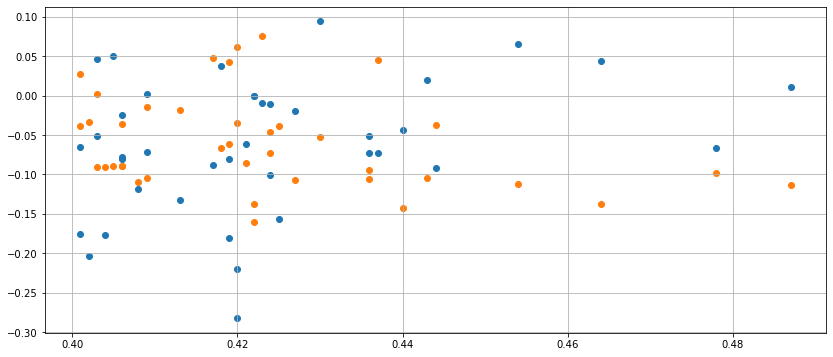

In [34]:
fig,ax=plt.subplots(figsize=(14,6))

ax.scatter(sub_results_df['zone woba'].values, sub_results_df['high diff'].values)
ax.scatter(sub_results_df['zone woba'].values, sub_results_df['low diff'].values)

ax.grid()

plt.show()